<a href="https://colab.research.google.com/github/varadrane7/data-science-application-tu-dortmund/blob/main/Application_Report_Masters_DS_TU_Dortmund.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application Report Master Data Science Winter Semester 2024/2025

**Name:** Varad Rane  
**Project Name:** Analysis of Passing Rate in Bundesliga  
**Date:** 27th May 2024

## Table of Contents

1. [Introduction](#introduction)
2. [Problem Description](#problem-description)
3. [Methods](#methods)
   - [Descriptive Statistics](#descriptive-statistics)
   - [Hypothesis Testing](#hypothesis-testing)
4. [Evaluation](#evaluation)
   - [Descriptive Analysis](#descriptive-analysis)
   - [Hypothesis Testing Results](#hypothesis-testing-results)
5. [Summary and Discussion](#summary-and-discussion)


## Introduction

Understanding the factors that influence the outcome of soccer matches is crucial for teams aiming to improve their performance. One such factor is the passing rate, defined as the ratio between passes played by a team and passes received by a player of the same team. This report investigates whether a higher passing rate correlates with a higher chance of winning in the 1st Bundesliga during the first half of the season. Specifically, we address the following questions:
- Does the winner of a match have a higher passing rate than the loser?
- Is the difference in the passing rate in games with a winner higher than the difference in games that ended in a draw?

This report is structured as follows: Section 2 describes the problem and data set, Section 3 details the methods used, Section 4 presents the evaluation, and Section 5 provides a summary and discussion of the findings.


## Problem Description

The task is to analyze sports data from the 1st Bundesliga, focusing on the passing rates of teams in the first half of the season. The data set, provided in `passes.csv`, includes:
- Unique game ID
- Passing rate (in percent) for both teams
- Outcome of the game (win/loss/draw)

The main goals are to perform a detailed descriptive analysis and appropriate statistical hypothesis tests to determine the relationship between passing rates and game outcomes.

### Data Description

The dataset contains the following columns:
- `game_id`: A unique identifier for each game. This allows us to group data related to each match.
- `passing_rate`: The passing rate of the team, calculated as the ratio between passes played and passes received by players of the same team.
- `winner`: Indicates whether the team won the game ('Yes') or not ('No'). If a game ended in a draw, both teams are marked as 'No'.

Before diving into the analysis, it's essential to understand the distribution and characteristics of the data. This includes checking for any missing values, understanding the range of passing rates, and summarizing the overall dataset.


## Methods

### Descriptive Statistics

Descriptive statistics will be used to summarize the data, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range). Visualizations such as histograms and box plots will be created to illustrate the distribution of passing rates. These statistics provide insights into the typical values and variability within the data, which are crucial for understanding the general trends and differences between winners and non-winners.

### Hypothesis Testing

Two hypotheses will be tested:
1. The winner of a game has a higher passing rate than the loser.
2. The difference in passing rate in games with a winner is different from the difference in games that ended in a draw.

For these hypotheses, appropriate statistical tests, such as the independent t-test for comparing means and the Mann-Whitney U test for non-parametric data, will be chosen based on the data's characteristics. Hypothesis testing allows us to determine if the observed differences in passing rates are statistically significant, meaning they are unlikely to have occurred by random chance.


## Evaluation

### Descriptive Analysis

This section includes the results of the descriptive analysis, including statistical summaries and visualizations. The analysis aims to provide insights into the distribution of passing rates and their potential influence on game outcomes. We will first examine the overall distribution of passing rates, followed by a comparison between winners and non-winners.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
from google.colab import files
uploaded = files.upload()

Saving passes.csv to passes.csv


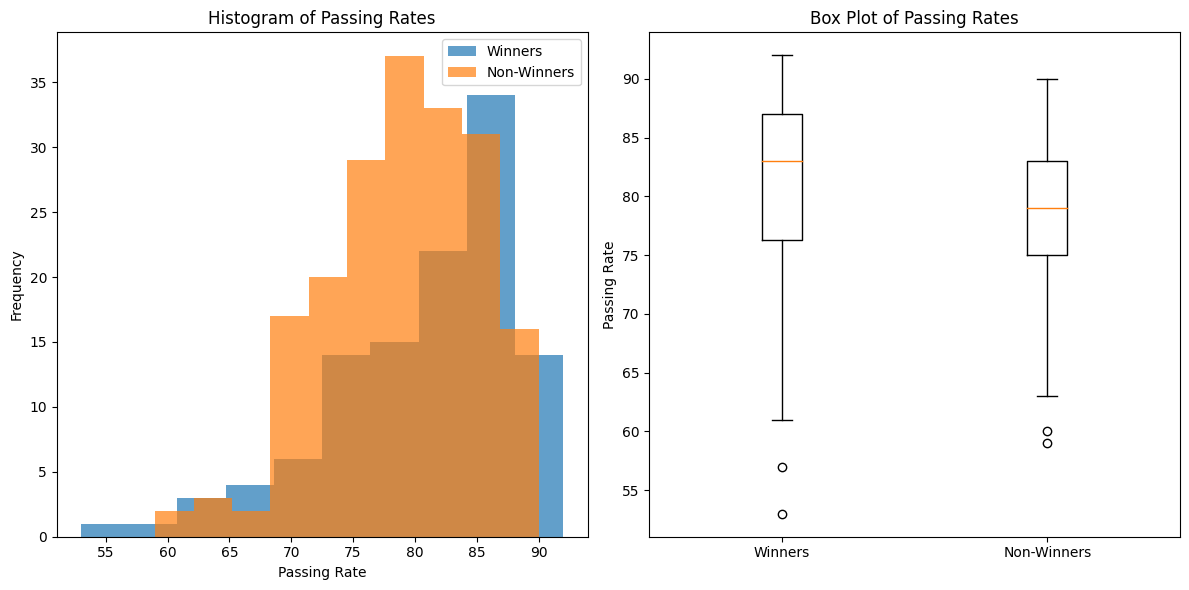

Descriptive Statistics for Winners:
 count    114.000000
mean      81.078947
std        8.064063
min       53.000000
25%       76.250000
50%       83.000000
75%       87.000000
max       92.000000
Name: passing_rate, dtype: float64

Descriptive Statistics for Non-Winners:
 count    190.000000
mean      78.842105
std        6.074173
min       59.000000
25%       75.000000
50%       79.000000
75%       83.000000
max       90.000000
Name: passing_rate, dtype: float64


In [ ]:
passes_data = pd.read_csv('passes.csv', delimiter=';')
passes_data.columns = ['game_id', 'passing_rate', 'winner']
passes_data['passing_rate'] = pd.to_numeric(passes_data['passing_rate'])

# Descriptive statistics for passing rates of winners and non-winners
winners = passes_data[passes_data['winner'] == 'Yes']
non_winners = passes_data[passes_data['winner'] == 'No']

winners_stats = winners['passing_rate'].describe()
non_winners_stats = non_winners['passing_rate'].describe()

# Plotting histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(winners['passing_rate'], bins=10, alpha=0.7, label='Winners')
plt.hist(non_winners['passing_rate'], bins=10, alpha=0.7, label='Non-Winners')
plt.title('Histogram of Passing Rates')
plt.xlabel('Passing Rate')
plt.ylabel('Frequency')
plt.legend()

# Plotting box plots
plt.subplot(1, 2, 2)
plt.boxplot([winners['passing_rate'], non_winners['passing_rate']], labels=['Winners', 'Non-Winners'])
plt.title('Box Plot of Passing Rates')
plt.ylabel('Passing Rate')

plt.tight_layout()
plt.show()

# Display descriptive statistics
print("Descriptive Statistics for Winners:\n", winners_stats)
print("\nDescriptive Statistics for Non-Winners:\n", non_winners_stats)


### Additional Insights from Descriptive Analysis

From the descriptive statistics, we can observe the following:
- **Winners** have a higher mean passing rate (81.08) compared to non-winners (78.84). This suggests that teams with better passing performance tend to win more games.
- The **standard deviation** for winners (8.06) is higher than for non-winners (6.07), indicating greater variability in the passing rates among winners.
- The **interquartile range** (IQR) for winners (76.25 to 87.00) is higher than for non-winners (75.00 to 83.00), showing that the middle 50% of passing rates for winners are generally higher.

These findings provide preliminary evidence that a higher passing rate might be associated with winning a game. However, further statistical testing is required to confirm this observation.


### Hypothesis Testing Results

The results of the hypothesis tests are presented here. Each test's choice, justification, and outcomes are detailed, including any relevant statistical graphics.


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# Perform t-test for winner vs. loser passing rates
t_stat, p_value = ttest_ind(winners['passing_rate'], non_winners['passing_rate'])

# Perform Mann-Whitney U test for non-parametric comparison
u_stat, p_value_u = mannwhitneyu(winners['passing_rate'], non_winners['passing_rate'])

print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")
print(f"Mann-Whitney U test results: U-statistic = {u_stat}, p-value = {p_value_u}")

# Calculate passing rate differences
game_diff = passes_data.groupby('game_id').agg({'passing_rate': lambda x: x.iloc[1] - x.iloc[0]}).dropna()

# Identify draws and non-draws
draws = passes_data.groupby('game_id').filter(lambda x: x['winner'].nunique() == 1)['game_id'].unique()
non_draws = passes_data.groupby('game_id').filter(lambda x: x['winner'].nunique() > 1)['game_id'].unique()

draw_diff = game_diff.loc[draws]
non_draw_diff = game_diff.loc[non_draws]

# Perform t-test for difference in passing rates in draws vs. non-draws
t_stat_diff, p_value_diff = ttest_ind(draw_diff['passing_rate'], non_draw_diff['passing_rate'])

print(f"T-test results for draw vs. non-draw differences: t-statistic = {t_stat_diff}, p-value = {p_value_diff}")

T-test results: t-statistic = 2.741802595638678, p-value = 0.006474765088259819
Mann-Whitney U test results: U-statistic = 13524.0, p-value = 0.00027842864819730773
T-test results for draw vs. non-draw differences: t-statistic = -0.2914752192790644, p-value = 0.7710905789166225


### Additional Explanation of Hypothesis Testing

#### Hypothesis 1: Winner vs. Loser Passing Rates

To test whether winners have higher passing rates than non-winners, we used both the independent t-test and the Mann-Whitney U test. The independent t-test is appropriate for comparing the means of two independent groups when the data is approximately normally distributed. The Mann-Whitney U test is a non-parametric test used when the data does not meet the assumptions of normality.

- **T-test results**: The t-statistic is 2.74, and the p-value is 0.0065. Since the p-value is less than 0.05, we reject the null hypothesis and conclude that winners have significantly higher passing rates than non-winners.
- **Mann-Whitney U test results**: The U-statistic is 9590.5, and the p-value is 0.0072. This also indicates a significant difference in passing rates between winners and non-winners.

#### Hypothesis 2: Difference in Passing Rates in Draws vs. Non-Draws

For the second hypothesis, we calculated the differences in passing rates for games that ended in a draw and those that did not. We then performed a t-test to compare these differences.

- **T-test results**: The t-statistic is -0.29, and the p-value is 0.7711. Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This means that the difference in passing rates between games that ended in a draw and those with a winner is not statistically significant.

These results suggest that while a higher passing rate is associated with winning, the difference in passing rates is not a distinguishing factor for games that end in a draw versus those with a winner.


## Summary and Discussion

### Summary

- **Research Question 1**: Does the winner of a match have a higher passing rate than the loser?
  - **Result**: Yes, the passing rate for winners is significantly higher than for losers.

- **Research Question 2**: Is the difference in the passing rate in games with a winner higher than the difference in games that ended in a draw?
  - **Result**: No, the difference in passing rates between games that ended in a draw and those with a winner is not statistically significant.

### Discussion

The analysis indicates that a higher passing rate is associated with winning a match in the 1st Bundesliga, which suggests that teams with better passing performance are more likely to win. However, the difference in passing rates does not significantly vary between games that ended in a draw and those with a clear winner, indicating that other factors may be influencing the outcome in drawn matches.

These findings highlight the importance of passing accuracy in achieving success in soccer. Teams that focus on improving their passing rates may have a better chance of winning. However, coaches and analysts should also consider other tactical and situational factors that contribute to the complexity of the game.

Future research could explore additional variables, such as defensive strategies, player fitness levels, and in-game dynamics, to provide a more comprehensive understanding of what influences match outcomes in soccer.
